R2 basic tutorial
=======

In this tutorial you will learn how to use the Python API of R* codes (http://www.es.lancs.ac.uk/people/amb/Freeware/R2/R2.htm).
Start by importing the `Project` master class from the API (Application Programming Interface).

1 Basics imports
---
Just import basic packages and the R2 API as a module (note : you will need to change the path for it, here we assume you launched the jupyter from inside the /examples/jupyter-notebook folder).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/dc-2d/'
from resipy import Project

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.0.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


2 Create an 'Project' object, import data and plot pseudo section
----
> The `Project` class was referred to as `R2` class in older version of ResIPy.

The first step is to create an object out of the `Project` class, let's call it ```k``` . This is the main object we are going to interact with. Then the second step is to read the data from a survey file. Here we choose a csv file from the Syscal Pro that contains resistivity data only. Note then when importing the survey data, the object automatically search for reciprocal measurements and will compute a reciprocal error with the ones it finds.

In [2]:
k = Project(typ='R2') # create a Project object in a working directory (can also set using k.setwd())
k.createSurvey(testdir + 'syscal.csv', ftype='Syscal') # read the survey file

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
308/344 reciprocal measurements found.
0 measurements error > 20 %


We can plot the pseudosection and display errors based on reciprocal measurements.

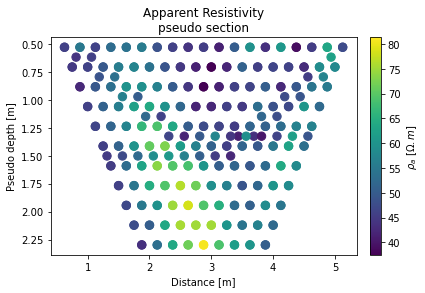

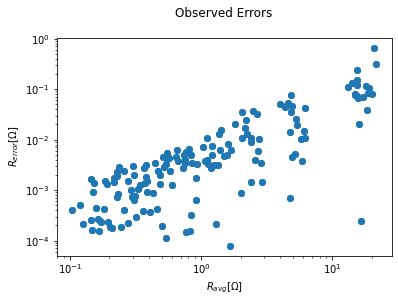

In [3]:
k.showPseudo()
k.showError() # plot the reciprocal errors

3 Data filtering
---
Below are a few examples of data filtering routines that can be used:
- `k.filterUnpaired()` to remove unpaired measurements (so measurements with no reciprocal) -> those could be dummy measurements in a dipole-dipole configuration
- `k.filterElec([5])` to remove a specific electrode (e.g. here all quadrupoles with electrode 5 are deleted)
- `k.filterRecip(20)` to remove measurements based on their relative reciprocal error (e.g. all quadrupoles with a reciprocal error > 20% are discarded).
More advanced data filtering can be achieved using the `filterData()` method from the `Survey` class. This method allows to filter out specific quadrupoles. An interactive version of it can be access using the `filterManual()` method which produces an interactive pseudo-section in the UI.

removeUnpaired:filterData: 36 / 344 quadrupoles removed.


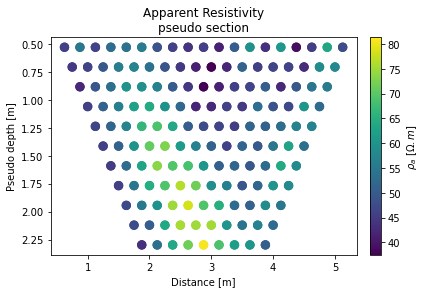

In [4]:
k.filterUnpaired()
k.showPseudo() # this actually removed the dummy measurements in this dipole-dipole survey (added for speed optimization)

filterData: 48 / 308 quadrupoles removed.
48 measurements removed!


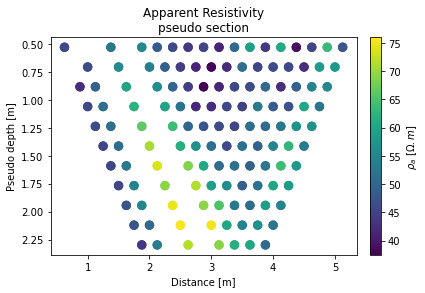

In [5]:
k.filterElec([5]) # remove all quadrupoles associated with electrode 5
k.showPseudo()

0 measurements with greater than 20.0% reciprocal error removed!


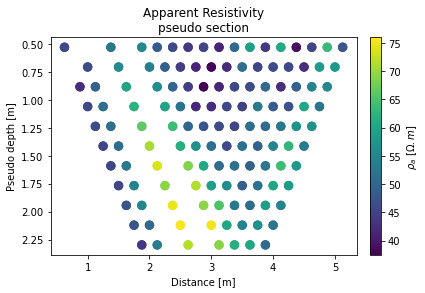

In [6]:
k.filterRecip(percent=20) # in this case this only removes one quadrupoles with reciprocal error bigger than 20 percent
k.showPseudo()

4 Fitting an error model
---
Different errors models are available to be fitted for DC data:
- a simple linear model: `k.fitErrorLin()`
- a power law model: `k.fitErrorPwl()`
- a linear mixed effect model: `k.fitErrorLME()` (on Linux only with an R kernel installed)
Each of those will create a new error column in the `Survey` object that will be used in the inversion if `k.err = True`.


Error model is R_err = 0.006*R_avg + 0 (R^2 = 0.996)


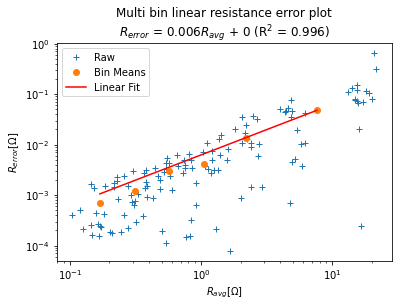

In [7]:
k.fitErrorLin()

Error model is R_err = 0.005 R_avg^1.127 (R^2 = 0.992)


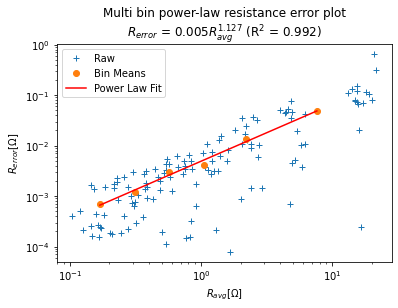

In [8]:
k.fitErrorPwl()

5 Mesh
----
Two types of mesh can be created in 2D:
- a quadrilateral mesh (`k.createMesh('quad')`)
- a triangular mesh (`k.createmesh('trian')`)
For 3D, only tetrahedral mesh can be created using `k.createMesh('tetra')`.

Creating quadrilateral mesh...ResIPy Estimated RAM usage = 0.004964 Gb
done


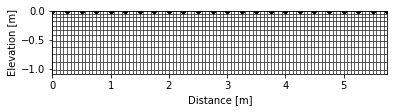

In [9]:
k.createMesh(typ='quad') # generate quadrilateral mesh (default for 2D survey)
k.showMesh()

Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.002423 Gb
done


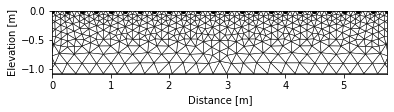

In [10]:
k.createMesh('trian', show_output=False) # this actually call gmsh.exe to create the mesh
k.showMesh()

7 Inversion
---
The inversion takes place in the specify working directory of the R2 object specified the first time the `k = R2(<workingDirectory>)` is called. It can be changed after by using `k.setwd(<newWorkingDirectory>)`.
The parameters of the inversion are defined in a dictionnary in `k.param` and ca be changed manually by the user (e.g. `k.param['a_wgt'] = 0.01`. All parameters have a default values and their names follow the R2 manual. The `.in` file is written automatically when the `k.invert()` method is called.

In [11]:
k.param['data_type'] = 1 # using log of resistitivy
k.err = True # if we want to use the error from the error models fitted before
k.invert() # this will do the inversion

Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 05 - 11 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<
 >> D a t a   w e i g h t   t o   b e   r e a d   f r o m   d a t a   f i l e <<


 Processing dataset   1


 Measurements read:   130     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.52480E+02

 

8 Results visualisation and post-processing
---
Results can be show with `k.showResults()`. Multiple arguments can be passed to the method in order rescale the colorbar bar, view the sensitivity or not, change the attribute or plot contour. The errors from the inversion can also be plotted using either `k.pseudoError()` or `k.showInvError()`.

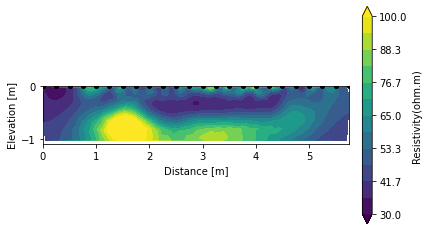

In [12]:
k.showResults(attr='Resistivity(ohm.m)', sens=False, contour=True, vmin=30, vmax=100)

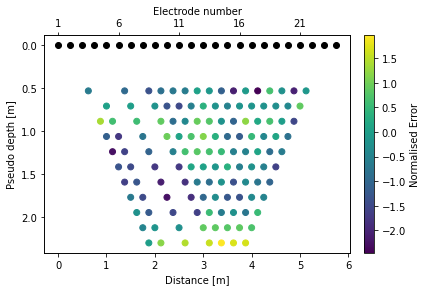

In [13]:
k.showPseudoInvError() # allow to see if some electrodes get higher error

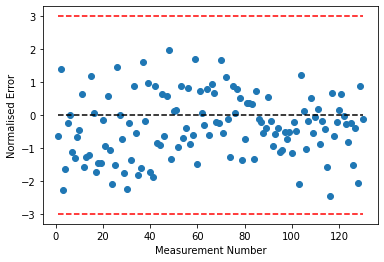

In [14]:
k.showInvError() # all errors should be between -3 and 3

In a nutshell
-------------
Below is a minimal example which imports the data, plots a pseudo section and inverts using all default parameters.

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
308/344 reciprocal measurements found.
0 measurements error > 20 %
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.003675 Gb
done
Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 05 - 11 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R

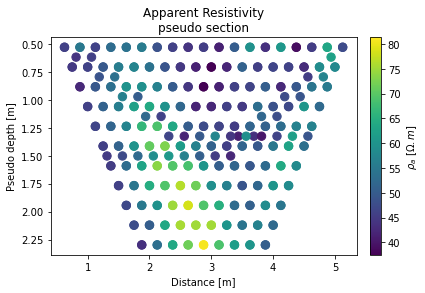

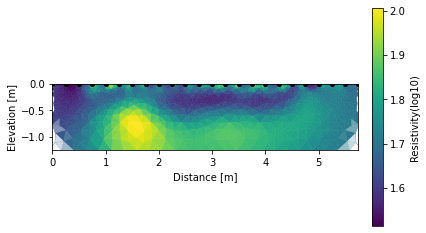

In [15]:
k = Project(typ='R2') # create an Project object in a working directory (can also set using k.setwd())
k.createSurvey(testdir + 'syscal.csv', ftype='Syscal') # read the survey file
k.showPseudo() # plot pseudo section
k.invert(iplot=True) # does the inversion (generate quand mesh and use default R2.in settings)